## Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
from sklearn import preprocessing
import scipy as sp
from sklearn.cluster import KMeans

## Data Prep

In [112]:
########### Reading Data set ############################################################
covid=pd.read_csv(r"C:\Users\TCOSDEMIR\Desktop\Digital Masters\covid-tests-cases-deaths.csv")

In [113]:
########### Data Type Tuning & filling N/A ############################################################
covid.Date=pd.to_datetime(covid.Date)

covid.Death.fillna(0,inplace=True)
covid.Death=covid.Death.astype("int")

covid.Case.fillna(0,inplace=True)
covid.Case=covid.Case.astype("int")

covid.GDP=pd.DataFrame(covid.GDP).astype("int64")
covid.Population=pd.DataFrame(covid.Population).astype("int64")

## Analyze the data

C:\Users\TCOSDEMIR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


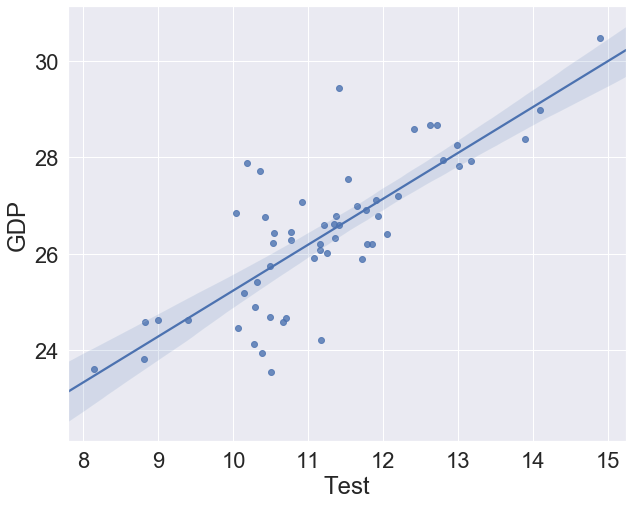

In [168]:
###### Test numbers & Case Correlation ###########################
covid_corr=covid.groupby("Country").max().reset_index().dropna()
covid_corr[["Test","Death","Case","GDP","Population"]]=np.log(covid_corr[["Test","Death","Case","GDP","Population"]])

sns.set(font_scale = 2)
plt.figure(figsize=(10,8))
ax = sns.regplot(x="Test", y="GDP", data=covid_corr)


In [57]:
# Correlaiton coefficient btw metrics
covid.groupby("Country").max().reset_index().dropna().corr()

,Test,Death,Case,GDP,Population
Test,1.000000,0.773882,0.955091,0.891133,0.212584
Death,0.773882,1.000000,0.844117,0.715461,0.123705
Case,0.955091,0.844117,1.000000,0.922433,0.185383
GDP,0.891133,0.715461,0.922433,1.000000,0.317326
Population,0.212584,0.123705,0.185383,0.317326,1.000000


## Imputation

In [173]:
# It shows us there is strong correlation test btw case so we can impute N/A test metrics

# We need to found a ratio for every country related to case
df=covid.groupby("Country").max().reset_index().dropna()
ratio=pd.DataFrame()
ratio["Country"]=df.Country
ratio["ratio"]=df.Case/df.Test

# Now we can impute tihs ratio to every day country by country
covid_new=covid.merge(ratio,on="Country",how="inner")
covid_new.Test[covid_new.Test.isna()]=covid_new.Case[covid_new.Test.isna()]/covid_new.ratio[covid_new.Test.isna()]

# Adding GDP per capita 
covid_new["GDP_per_capita"]=(covid_new.GDP/covid_new.Population).astype("int")

# Test per GDP

covid_new["Test_perf"]=covid_new.Test/covid_new.GDP_per_capita

C:\Users\TCOSDEMIR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [217]:
df=covid.groupby("Country").max().reset_index().dropna()


,Test,Death,Case,GDP,Population
6,22805.0,98,2272,460334000000,45196000
8,362136.0,61,6366,1375720000000,25500000
9,151796.0,368,14043,432790000000,9006000
12,70813.0,7,1361,33003237141,1702000
16,114367.0,3903,30589,524013000000,11590000
30,437475.0,780,25663,1883710000000,37742000
34,85035.0,82,7525,271896000000,19116000
38,6796.0,3,612,48037268859,5094000
42,131542.0,143,6059,241263000000,10709000
44,74210.0,285,6318,355305000000,5792000


## Modelling the data

In [220]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

df=covid.groupby("Country").max().reset_index().dropna()

X=df.iloc[:,2:].drop("Death",axis=1)
y=df.Death
X=sm.add_constant(X)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)



lm = sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Death   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     38.26
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           8.89e-15
Time:                        15:41:03   Log-Likelihood:                -513.84
No. Observations:                  56   AIC:                             1038.
Df Residuals:                      51   BIC:                             1048.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        771.7535    392.548      1.966      0.055     -16.319    1559.826
Test          -0.0036      0.003     -1.407      0.165      -0.009       0.002
Case           0.0902      0.017      5.425      0.000       0.057       0.124
GDP         -8.48e-10   3.74e-10     -2.268      0.028    -1.6e-09   -9.73e-11
Population  1.139e-06   1.92e-06      0.593      0.556   -2.72e-06       5e-06
==============================================================================
Omnibus:                       59.474   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.740
Skew:                           2.976   Prob(JB):                     2.05e-73
Kurtosis:                      13.394   Cond. No.                     3.19e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualization

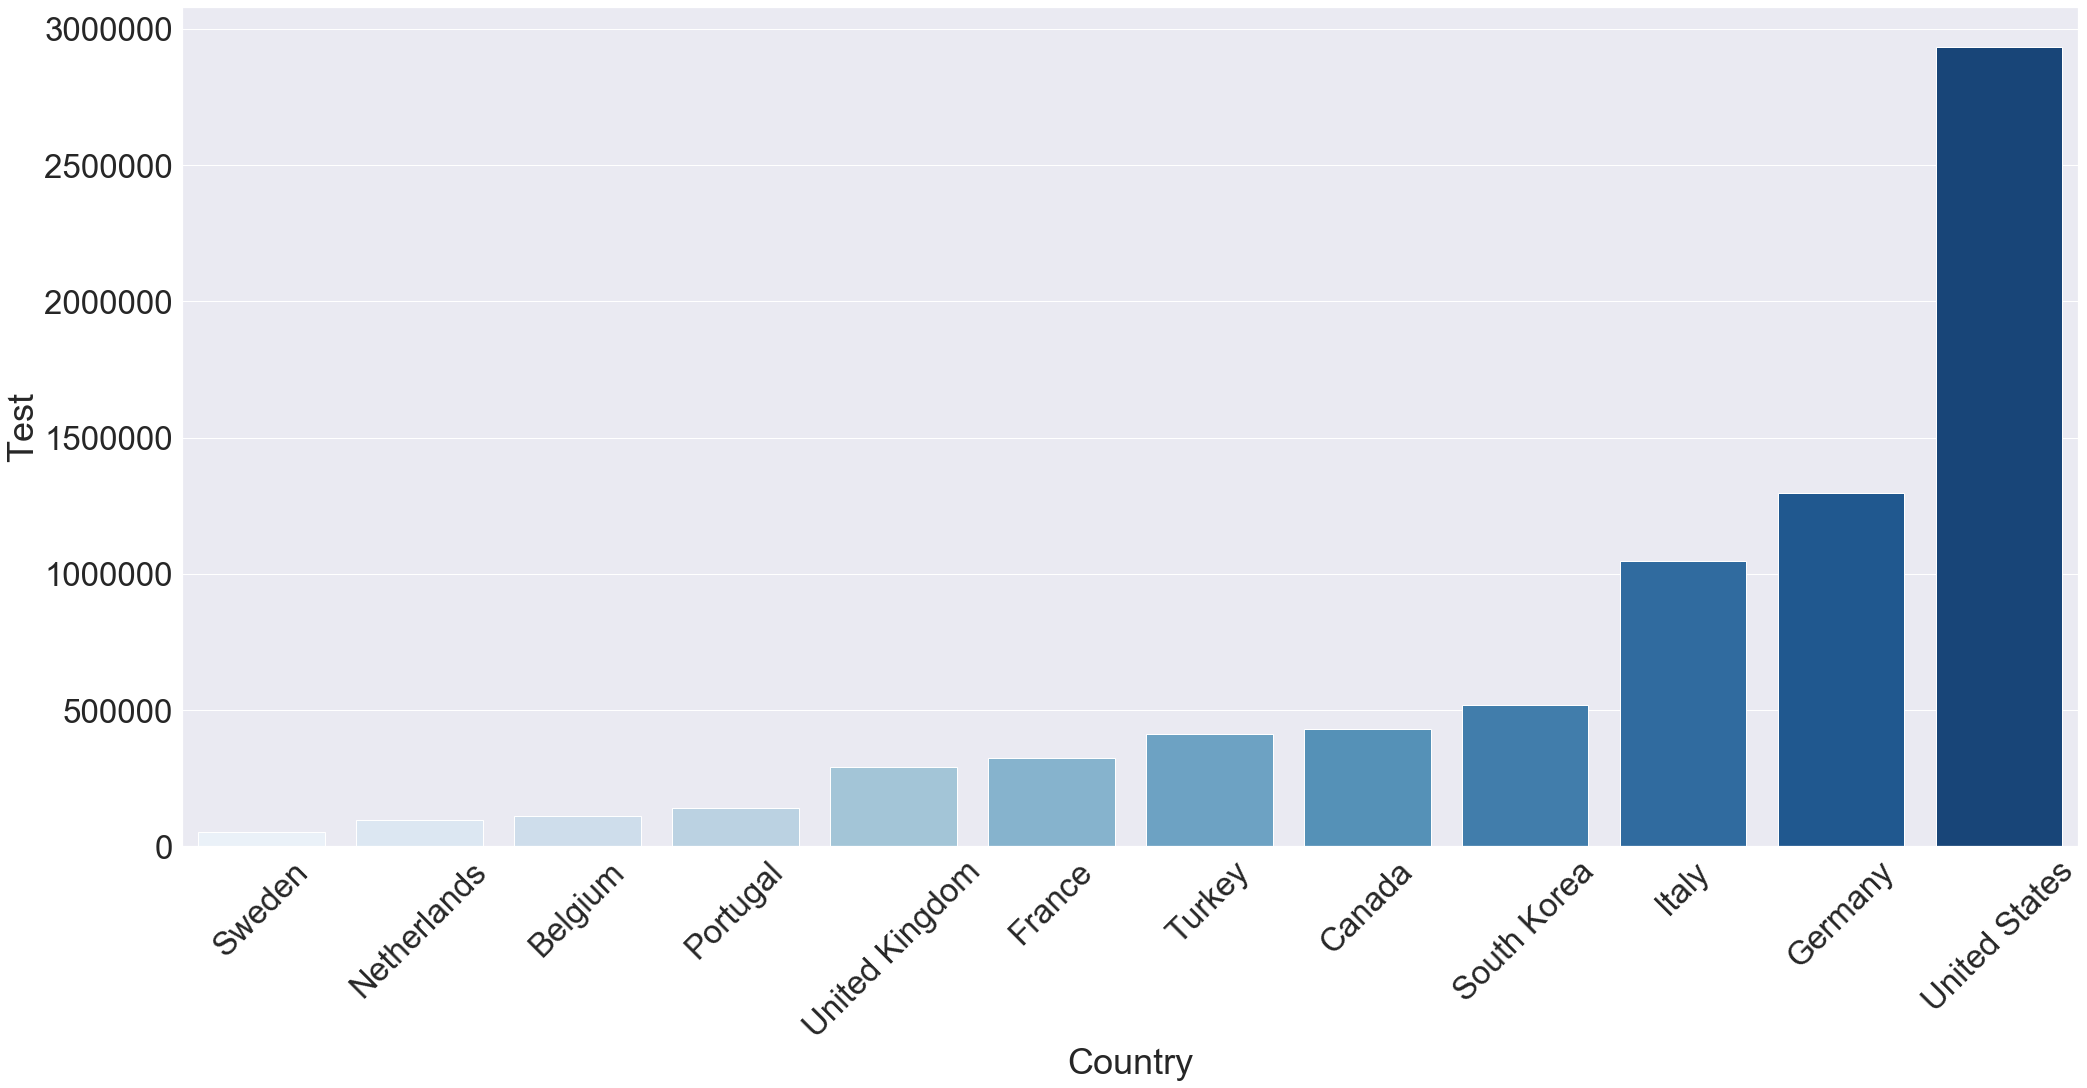

In [213]:
sns.set(font_scale = 3)
plt.figure(figsize=(30,16))
ax = sns.barplot(x="Country", y="Test",palette="Blues", data=covid_new[(covid_new.Population>10000000) & (covid_new.Date=="2020-04-13") & (covid_new.Case>10000)].sort_values(by="Test"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig("test_output.png");